MENTAL HEALTH IN TECH SURVEY

Importing the Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')


Understanding the Data:

In [2]:
df=pd.read_csv("../survey.csv")
print(df.shape)
print(df.columns)
df.head()


(1259, 27)
Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [4]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [5]:
df['Country'].value_counts()

Country
United States             751
United Kingdom            185
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Italy                       7
Sweden                      7
Switzerland                 7
South Africa                6
Brazil                      6
Belgium                     6
Israel                      5
Singapore                   4
Bulgaria                    4
Russia                      3
Austria                     3
Finland                     3
Mexico                      3
Denmark                     2
Greece                      2
Portugal                    2
Colombia                    2
Croatia                     2
Slovenia                    1
Costa Rica                  1
Latvia                      1
Uruguay                     1
Sp

Cleaning the Dataset:

In [6]:
df= df[df['Country'].isin(['United States','United Kingdom','Canada','Germany','Ireland','Netherlands','Australia','France','India'])]

In [7]:
df.drop(columns=['Timestamp', 'comments','state','self_employed'], inplace= True)

In [8]:
print("Age groups: \n")
print(df['Age'].unique(), "\n")
print("Gender categories: \n")
print(df['Gender'].unique())

Age groups: 

[   37    44    32    31    33    35    39    42    23    36    27    29
    46    41    34    30    40    50    24    18    38    28    26    22
    19    25    45    21   -29    43    56    60    54   329    55    48
    20    57    58    47    62    65    49 -1726     5    51    53    11
    -1    72] 

Gender categories: 

['Female' 'M' 'Male' 'female' 'male' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'Cis Male' 'Woman' 'f' 'Male (CIS)' 'queer/she/they'
 'non-binary' 'Femake' 'woman' 'Make' 'Nah' 'Enby' 'fluid' 'Genderqueer'
 'Female ' 'Androgyne' 'Agender' 'cis-female/femme' 'Guy (-ish) ^_^'
 'male leaning androgynous' 'Male ' 'Man' 'Trans woman' 'msle' 'Neuter'
 'Female (trans)' 'queer' 'Female (cis)' 'Mail' 'cis male' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [9]:
df= df[(df['Age']>=16)& (df['Age']<=75)].copy()
print("Age entries:", df['Age'].unique())

Age entries: [37 44 32 31 33 35 39 42 23 36 27 29 46 41 34 30 40 50 24 18 38 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 65 49 51 53 72]


In [10]:
df['Gender']=df['Gender'].str.lower().str.strip()
df['Gender'].unique()

array(['female', 'm', 'male', 'male-ish', 'maile', 'trans-female',
       'cis female', 'f', 'cis male', 'woman', 'male (cis)',
       'queer/she/they', 'non-binary', 'femake', 'make', 'nah', 'enby',
       'fluid', 'genderqueer', 'androgyne', 'agender', 'cis-female/femme',
       'guy (-ish) ^_^', 'male leaning androgynous', 'man', 'trans woman',
       'msle', 'neuter', 'female (trans)', 'queer', 'female (cis)',
       'mail', 'femail', 'cis man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [11]:
def clean_gender(gender):
    g=str(gender)
    if g in ['male', 'm','cis male','male-ish', 'maile', 'mal','male (cis)','make','cis man','malr','mail','msle','man']:
        return 'Male'
    if g in ['female','cis female','f','woman','femake','cis-female/femme','female (cis)','femail']:
        return 'Female'
    if g in ['trans-female','something kinda male?','queer/she/they','non-binary','nah','enby','fluid','genderqueer','androgyne','agender','guy (-ish) ^_^','male leaning androgynous','trans woman','neuter','female(trans)','queer','ostensibly male, unsure what that really means']:
        return 'Other'
    return 'Other'
df['Gender']=df['Gender'].apply(clean_gender)
print(df['Gender'].unique())

['Female' 'Male' 'Other']


In [12]:
df['work_interfere']=df['work_interfere'].fillna("Unknown")
df['work_interfere'].value_counts()

work_interfere
Sometimes    435
Unknown      234
Never        193
Rarely       156
Often        127
Name: count, dtype: int64

In [13]:
df = df[(df['tech_company'] == 'Yes')]
df = df.drop("tech_company", axis=1)

In [14]:
df['no_employees'].value_counts()

no_employees
6-25              233
26-100            217
More than 1000    183
1-5               135
100-500           124
500-1000           39
Name: count, dtype: int64

In [15]:
size_map={
    '1-5':'Small',
    '6-25':'Small',
    '26-100': 'Medium',
    '100-500': 'Medium',
    '500-1000': 'Large',
    'More than 1000': 'Large'
}
df['no_employees']= df['no_employees'].map(size_map)
size_map={
    'Small': 1,
    'Medium': 2,
    'Large': 3
}
df['company_size']= df['no_employees'].map(size_map)
df['no_employees'].value_counts()

no_employees
Small     368
Medium    341
Large     222
Name: count, dtype: int64

In [16]:
df['leave'].value_counts()

leave
Don't know            425
Somewhat easy         189
Very easy             162
Somewhat difficult     88
Very difficult         67
Name: count, dtype: int64

In [17]:
leave_map={
    'Somewhat easy':'Easy',
    'Very easy': 'Easy',
    'Somewhat difficult':'Difficult',
    'Very difficult': 'Difficult',
    "Don't know": "Don't know"
}
df['leave']= df['leave'].map(leave_map)

In [18]:
cowork_map = {
    'Some of them': "Yes",
    "No": "No",
    "Yes": "Yes"
}

df['coworkers'] = df['coworkers'].map(cowork_map)

In [19]:
supervisor_map = {
    'Some of them': 'Yes',
    'No': 'No',
    'Yes': 'Yes'
}

df['supervisor'] = df['supervisor'].map(supervisor_map)

Analysing the data:

UNIVARIATE ANALYSIS

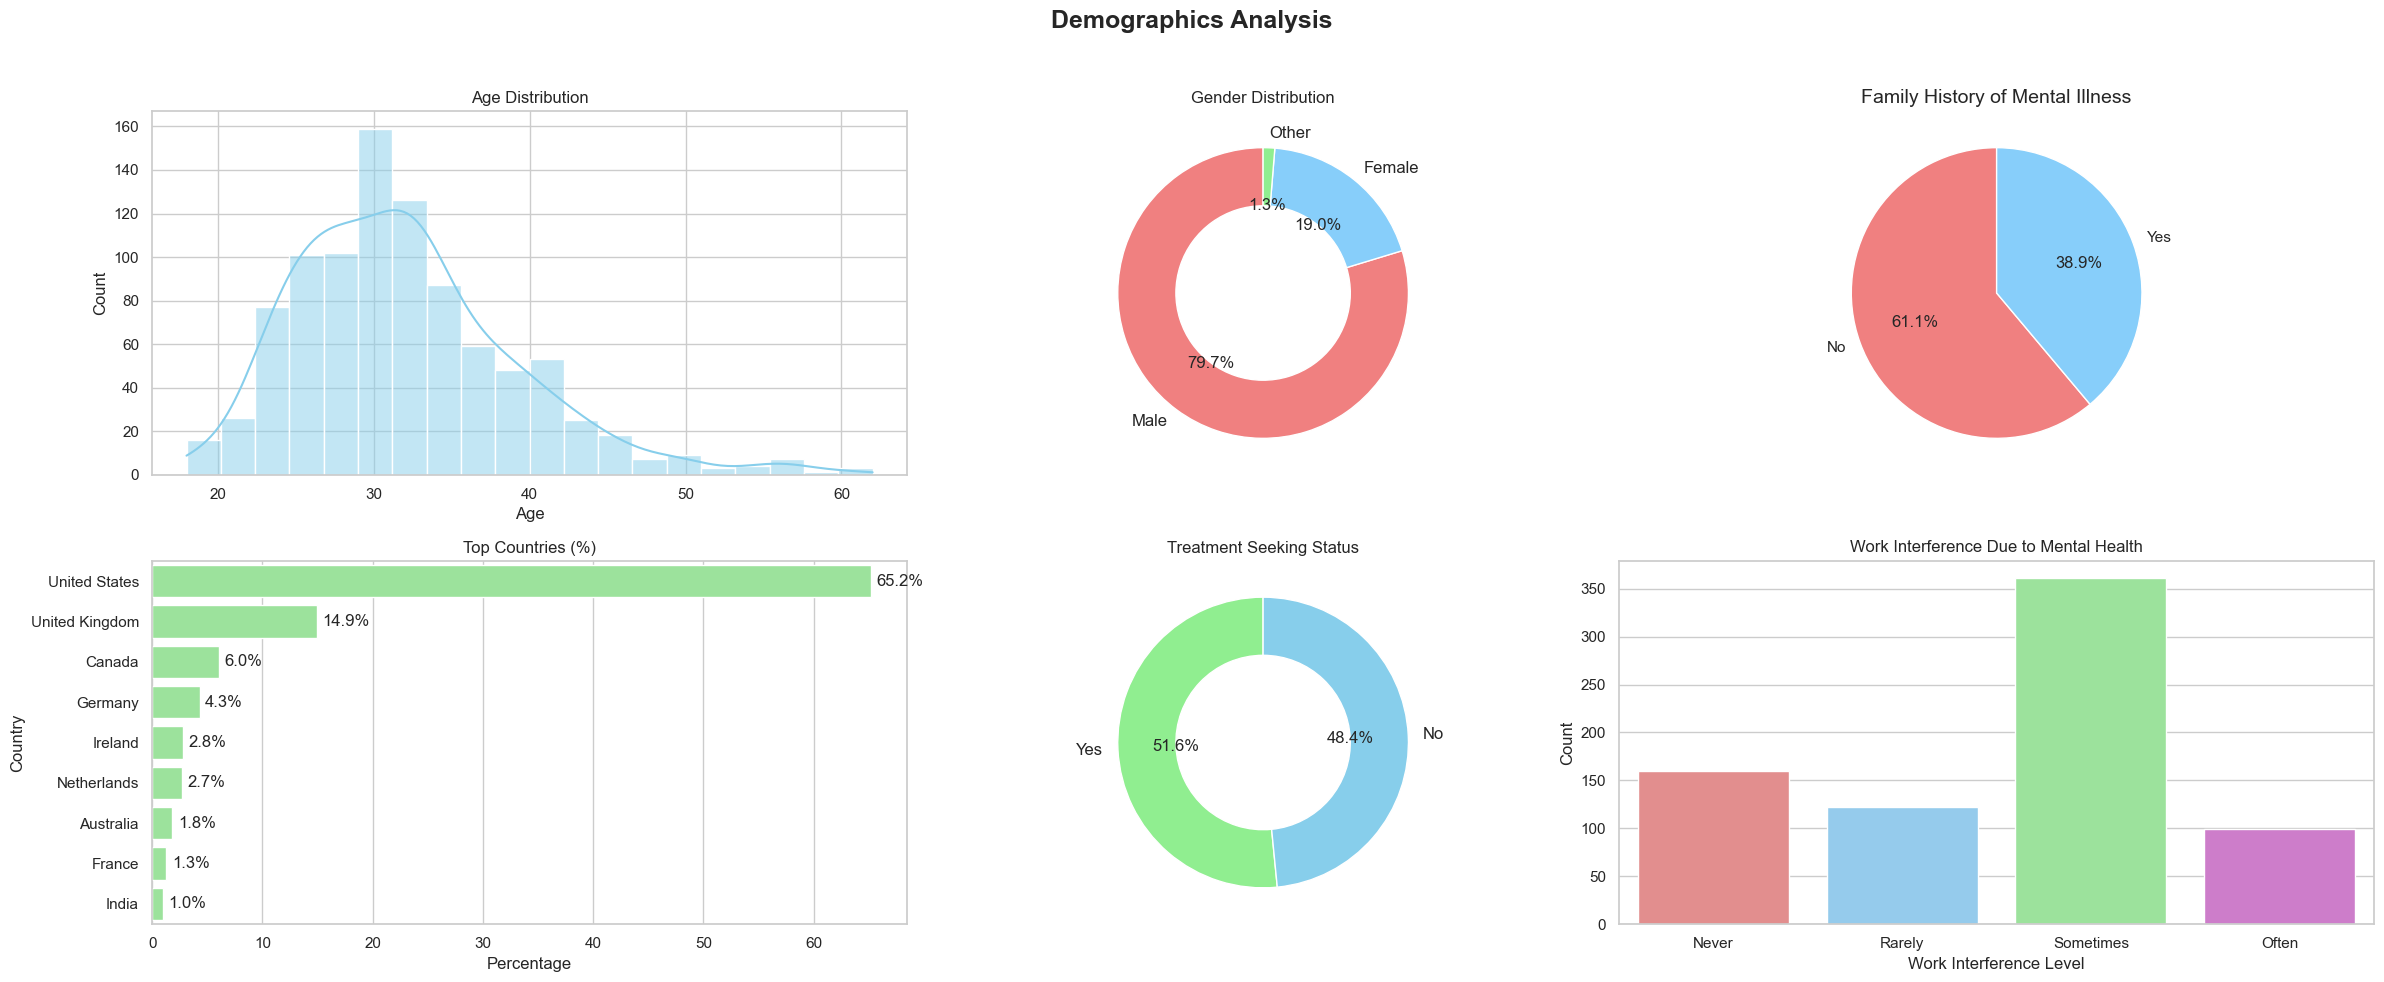

In [20]:
sns.set(style="whitegrid", palette="pastel")
fig, axes= plt.subplots(2,3, figsize=(24,10))
fig.suptitle('Demographics Analysis', fontsize=18, fontweight='bold')

# Age distribution
sns.histplot(df['Age'],kde=True,bins=20, ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Count')

# Gender distribution
gender_counts=df['Gender'].value_counts(normalize=True)*100
colors = ['lightcoral', 'lightskyblue', 'lightgreen'] 
wedges, texts, autotexts = axes[0,1].pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4) 
)
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(12)
axes[0,1].set_title('Gender Distribution')

#Family History
family_counts = df['family_history'].value_counts()
wedges, texts, autotexts = axes[0,2].pie(
    family_counts,
    labels=family_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
axes[0,2].set_title("Family History of Mental Illness", fontsize=14)

# Top countries
country_counts = df['Country'].value_counts(normalize=True)* 100
sns.barplot(y=country_counts.index, x=country_counts.values, ax=axes[1,0], color='lightgreen')
axes[1,0].set_title('Top Countries (%)')
axes[1,0].set_xlabel('Percentage')
axes[1,0].set_ylabel('Country')
for i, v in enumerate(country_counts.values):
    axes[1,0].text(v + 0.5, i, f"{v:.1f}%", va='center')

# Treatment seeking status
treatment_counts = df['treatment'].value_counts(normalize=True) * 100
colors = ['lightgreen','skyblue']
wedges, texts, autotexts = axes[1,1].pie(
    treatment_counts,
    labels=treatment_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4)
)
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(12)
axes[1,1].set_title('Treatment Seeking Status')

sns.countplot(data=df, x="work_interfere", ax=axes[1,2], palette=['lightcoral', 'lightskyblue', 'lightgreen','orchid'],
              order=["Never", "Rarely", "Sometimes", "Often"])
axes[1,2].set_title("Work Interference Due to Mental Health")
axes[1,2].set_xlabel("Work Interference Level")
axes[1,2].set_ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


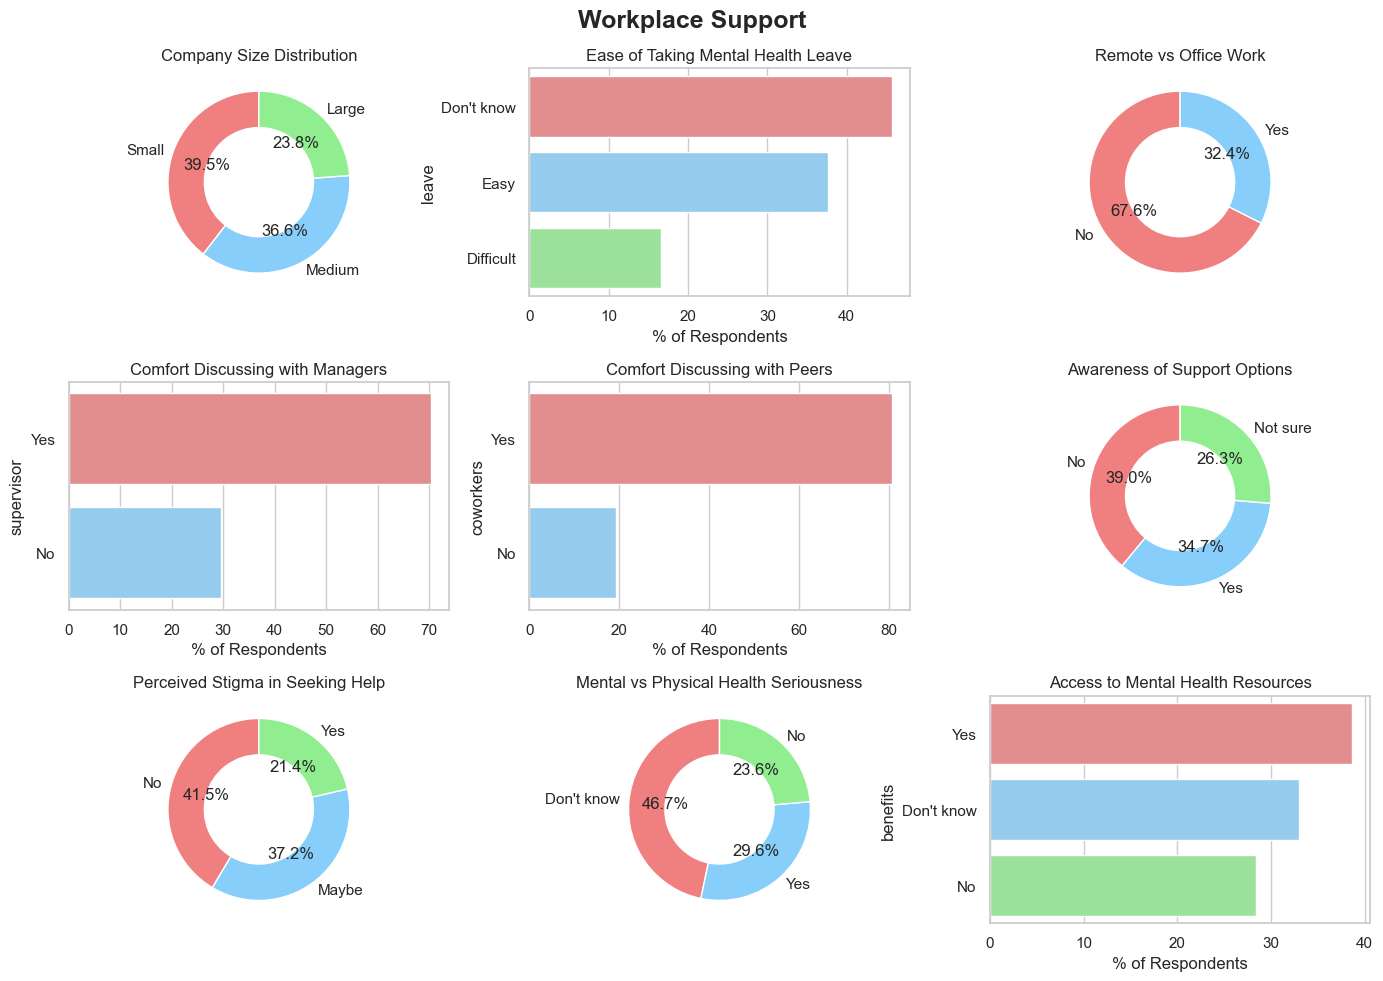

In [21]:
fig, axes = plt.subplots(3, 3, figsize=(14, 10))
fig.suptitle("Workplace Support", fontsize=18, fontweight='bold')
main_colors = ['lightcoral', 'lightskyblue', 'lightgreen']

# Company size distribution
size_counts = df['no_employees'].value_counts(normalize=True) * 100
axes[0,0].pie(size_counts, labels=size_counts.index, autopct='%1.1f%%',
            startangle=90, colors=main_colors, wedgeprops=dict(width=0.4))
axes[0,0].set_title("Company Size Distribution")

# Ease of a mental health leave
leave_counts = df['leave'].value_counts(normalize=True) * 100
sns.barplot(x=leave_counts.values, y=leave_counts.index, palette=main_colors, ax=axes[0,1])
axes[0,1].set_title("Ease of Taking Mental Health Leave")
axes[0,1].set_xlabel("% of Respondents")

# Remote Work
remote_counts = df['remote_work'].value_counts(normalize=True) * 100
axes[0,2].pie(remote_counts, labels=remote_counts.index, autopct='%1.1f%%',
               startangle=90, colors=main_colors, wedgeprops=dict(width=0.4))
axes[0,2].set_title("Remote vs Office Work")

# Comfort level with managers
sup = df['supervisor'].value_counts(normalize=True) * 100
sns.barplot(x=sup.values, y=sup.index, palette=main_colors, ax=axes[1, 0])
axes[1, 0].set_title("Comfort Discussing with Managers")
axes[1, 0].set_xlabel("% of Respondents")

# Comfort level with colleagues
cowork = df['coworkers'].value_counts(normalize=True) * 100
sns.barplot(x=cowork.values, y=cowork.index, palette=main_colors, ax=axes[1,1])
axes[1,1].set_title("Comfort Discussing with Peers")
axes[1,1].set_xlabel("% of Respondents")

# Awareness of Care options
care = df['care_options'].value_counts(normalize=True) * 100
axes[1,2].pie(care, labels=care.index, autopct='%1.1f%%',
               startangle=90, colors=main_colors, wedgeprops=dict(width=0.4))
axes[1,2].set_title("Awareness of Support Options")

# Stigma present
mh_stigma = df['mental_health_consequence'].value_counts(normalize=True) * 100
axes[2, 0].pie(mh_stigma, labels=mh_stigma.index, autopct='%1.1f%%',
               startangle=90, colors=main_colors, wedgeprops=dict(width=0.4))
axes[2, 0].set_title("Perceived Stigma in Seeking Help")

# Mental health seriousness
mh_serious = df['mental_vs_physical'].value_counts(normalize=True) * 100
axes[2,1].pie(mh_serious, labels=mh_serious.index, autopct='%1.1f%%',
               startangle=90, colors=main_colors, wedgeprops=dict(width=0.4))
axes[2, 1].set_title("Mental vs Physical Health Seriousness")

# Access to resources
mh_benefits = df['benefits'].value_counts(normalize=True) * 100
sns.barplot(x=mh_benefits.values, y=mh_benefits.index, palette=main_colors, ax=axes[2,2])
axes[2,2].set_title("Access to Mental Health Resources")
axes[2,2].set_xlabel("% of Respondents")

plt.tight_layout()
plt.show()

BIVARIATE ANALYSIS

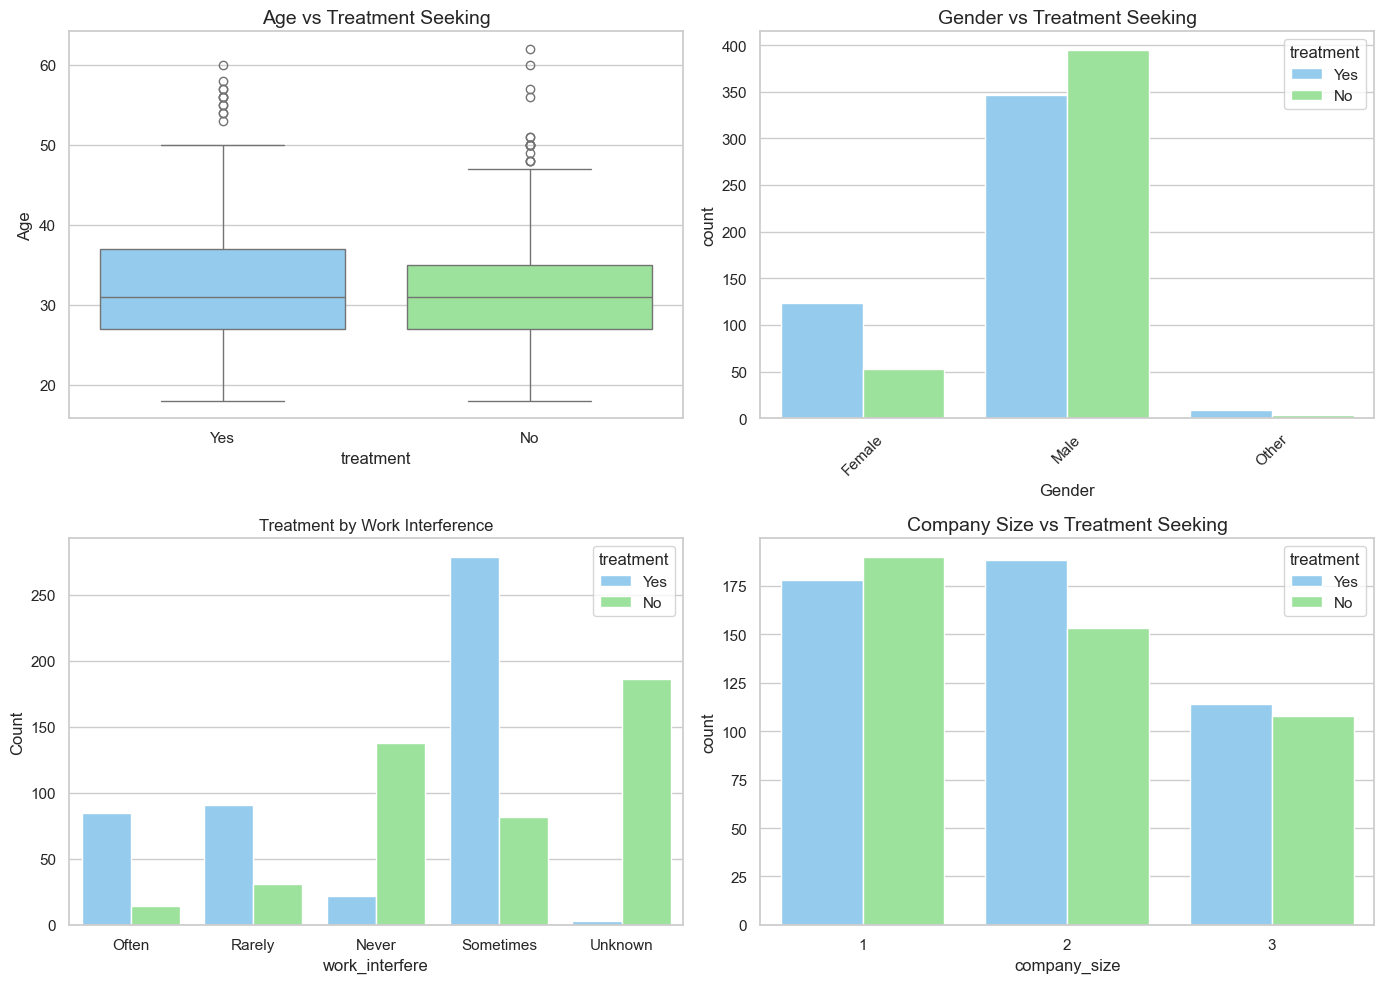

In [22]:
sns.set(style="whitegrid", palette="pastel")
fig, axes= plt.subplots(2,2, figsize=(14,10))
colors= ['lightskyblue', 'lightgreen','lightcoral']

# Age vs Treatment 
sns.boxplot(data=df, x='treatment', y='Age', palette=colors, ax=axes[0,0])
axes[0,0].set_title('Age vs Treatment Seeking', fontsize=14)

# Gender vs Treatment 
sns.countplot(data=df, x='Gender', hue='treatment', palette=colors, ax=axes[0,1])
axes[0,1].set_title('Gender vs Treatment Seeking', fontsize=14)
axes[0,1].tick_params(axis='x', rotation=45)

# Work Interference vs Treatment
sns.countplot(data=df, x='work_interfere', hue='treatment', palette=colors, ax=axes[1,0])
axes[1,0].set_title("Treatment by Work Interference")
axes[1,0].set_ylabel("Count")

# Company size vs Treatment
sns.countplot(data=df, x='company_size', hue='treatment', palette=colors, ax=axes[1,1])
axes[1,1].set_title('Company Size vs Treatment Seeking', fontsize=14)


plt.tight_layout()
plt.show()



MULTIVARIATE ANALYSIS

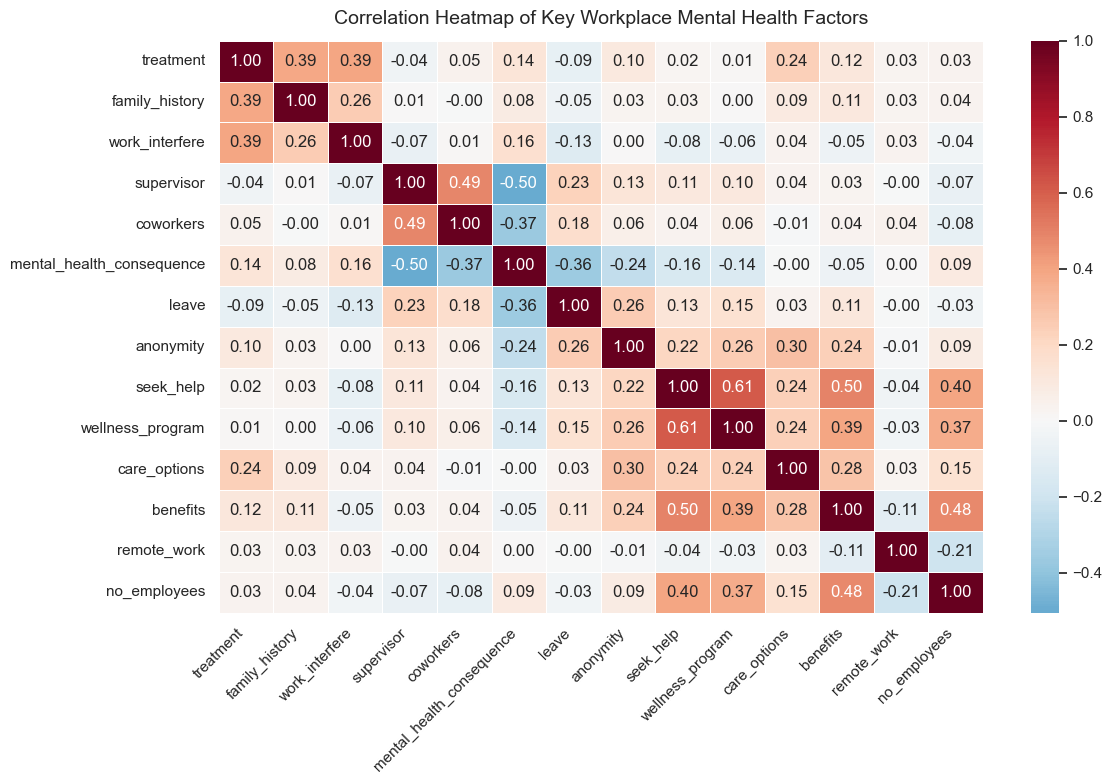

In [23]:
df_binary = df.copy()
df_binary = df_binary.drop(columns=['Country'])

mappings = {
    'obs_consequence': {'Yes': 1, 'No': 0},
    'supervisor': {'Yes': 1, 'No': 0},
    'coworkers': {'Yes': 1, 'No': 0},
    'mental_health_consequence': {'Yes': 1, 'No': 0, 'Maybe': 0.5},
    'leave': {'Easy': 1, 'Difficult': 0, "Don't know": 0.5},
    'anonymity': {'Yes': 1, 'No': 0, "Don't know": 0.5},
    'seek_help': {'Yes': 1, 'No': 0, "Don't know": 0.5},
    'wellness_program': {'Yes': 1, 'No': 0, "Don't know": 0.5},
    'care_options': {'Yes': 1, 'No': 0, 'Not sure': 0.5},
    'benefits': {'Yes': 1, 'No': 0, "Don't know": 0.5},
    'remote_work': {'Yes': 1, 'No': 0},
    'no_employees': {'Small': 0, 'Medium': 0.5, 'Large': 1},
    'work_interfere': {'Unknown': 0.5, 'Rarely': 0, 'Never': 0, 'Often': 1, 'Sometimes': 1},
    'treatment': {'Yes': 1, 'No': 0},
    'family_history': {'Yes': 1, 'No': 0},
    'self_employed': {'Yes': 1, 'No': 0},
    'Gender': {'Male': 0, 'Female': 1, 'Other': 0.5}
}

for col, mapping in mappings.items():
    if col in df_binary.columns:
        df_binary[col] = df_binary[col].map(mapping)

df_binary = df_binary.dropna()

# Selecting relevant features 
important_features = [
    'treatment', 'family_history', 'work_interfere', 'supervisor',
    'coworkers', 'mental_health_consequence', 'leave', 'anonymity',
    'seek_help', 'wellness_program', 'care_options', 'benefits',
    'remote_work', 'no_employees'
]

df_corr = df_binary[important_features].corr()

df_corr = df_corr.reindex(index=important_features, columns=important_features)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    df_corr, 
    annot=True, 
    cmap='RdBu_r', 
    fmt=".2f", 
    linewidths=0.5, 
    center=0
)
plt.title("Correlation Heatmap of Key Workplace Mental Health Factors", fontsize=14, pad=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [24]:
joblib.dump(df, "../Models & Dataset/df.pkl")

['../Models & Dataset/df.pkl']